In [1]:
import torch
from torch import nn
import useTool as ut
import drawPlot as dP
import ch3
import FashionMnistTool as fmt

In [2]:
batch_size = 256
train_iter, test_iter = fmt.load_data_fashion_mnist(batch_size)

# 初始化参数模型

In [3]:
# PyTorch不会隐式地调整输⼊的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整⽹络输⼊的形状

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10)) # Flatten把任何维度的tensor变成2D的tensor。其中，第0维度保留，剩下的维度全部展成向量

def init_weights(m): # m是当前的layer
    if type(m) == nn.Linear: # 如果是linear layer的话
        nn.init.normal_(m.weight, std=0.01) # 初始为均值为0，方差为0.01的随机值

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [4]:
loss = nn.CrossEntropyLoss(reduction='none')

In [5]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

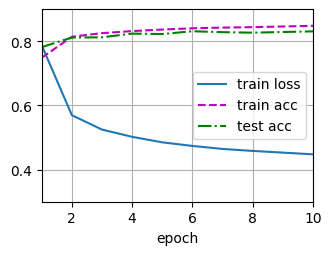

In [6]:
num_epochs = 10
ch3.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# Figure size 252*180 with 1 Axes